<a href="https://colab.research.google.com/github/Collokd/Collokd/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_05_Collins_Kemboi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Question

> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [2]:
# Loading the Data from the source
# Dataset url = http://bit.ly/FinancialDataset
#

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib

from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the Data from the source i.e. csv

url = 'http://bit.ly/FinancialDataset'
df = pd.read_csv(url)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
df.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

In [5]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. External Data Source Validation

### a.Validation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [9]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [10]:
df['Type of Location'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [11]:
df['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [12]:
df['Type of Job' ].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

In [13]:
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

## 5. Tidying the Dataset

In [14]:
df.shape

(23524, 13)

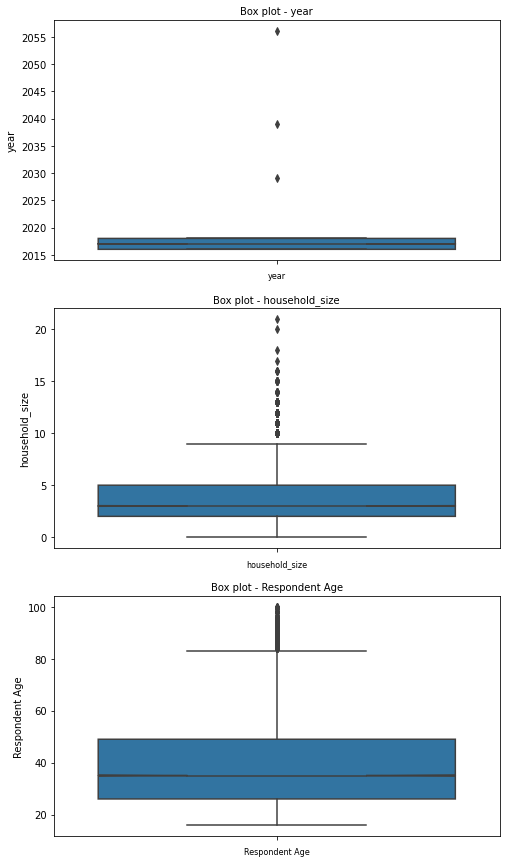

In [15]:
# Checking for Outliers
#
col_names = ['year', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val], notch=True, ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [16]:
# Checking for Anomalies
#
q1_HS = df['household_size'].quantile(.25)
q3_HS = df['household_size'].quantile(.75)

iqr_HS = q3_HS - q1_HS

print(iqr_HS)

q1_RA = df['Respondent Age'].quantile(.25)
q3_RA = df['Respondent Age'].quantile(.75)

iqr_RA = q3_RA - q1_RA

print(iqr_RA)

3.0
23.0


In [17]:
# Identifying the Missing Data
#
df.isnull().values.any()

True

In [18]:
# Dealing with the Missing Data
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
df = df.dropna()

In [20]:
df.isnull().values.any()

False

In [21]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [22]:
# More data cleaning procedures
#
df.duplicated().values.any()

False

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [24]:
# Removing Outliers in year

df = df[df['year'] <= 2018]
df['year'].unique()


array([2018, 2016, 2017])

In [25]:
df.describe()

,year,household_size,Respondent Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [0]:
#DROP uniqueid COLUMN BECAUSE WE DO NOT NEED IT IN OUR ANALYSIS

df.drop('uniqueid',axis=1,inplace= True)

In [27]:
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

## 6. Exploratory Analysis

1. Univariate Analysis

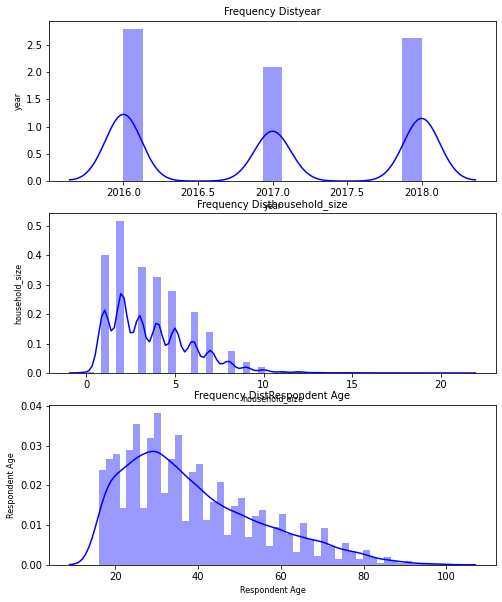

In [39]:
# Ploting the univariate summaries and recording our observations
#
col_names = ['year', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,10))

for i, col_val in enumerate(col_names):
  sns.distplot(df[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_title('Frequency Dist' + col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

In [29]:
# Measure of Central Tendancy for categorical data

df_mode =df[['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']].mode()
df_mode.T

,0
country,Rwanda
year,2016
Has a Bank account,No
Type of Location,Rural
Cell Phone Access,Yes
household_size,2
Respondent Age,30
gender_of_respondent,Female
The relathip with head,Head of Household
marital_status,Married/Living together


In [30]:
# Measure of Central Tendancy for numerical
df.describe()
# 25% is the first quatile
# 50% is the median
# 75% is the third quatile
# std is the standard deviation

,year,household_size,Respondent Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [32]:
# INTERQUATILE RANGE AGE
q1_AGE,q3_AGE = np.percentile(df['Respondent Age'],[25,75])
iqr_AGE = q3_AGE - q1_AGE
print('THE AGE INTERQUATILE RANGE IS',iqr_AGE)
# confidence interval
l_bound_AGE = q1_AGE - (1.5*iqr_AGE)
u_bound_AGE = q3_AGE + (1.5*iqr_AGE)
print('Confidence interval is =',u_bound_AGE,'--',l_bound_AGE )
print('\n')

# INTERQUATILE RANGE HOUSEHOLDSIZE
q1_HOUSEHOLDSIZE,q3_HOUSEHOLDSIZE = np.percentile(df['household_size'],[25,75])
iqr_HOUSEHOLDSIZE = q3_HOUSEHOLDSIZE - q1_HOUSEHOLDSIZE
print('THE HOUSEHOLDSIZE INTERQUATILE RANGE IS',iqr_HOUSEHOLDSIZE)
# confidence interval
l_bound_HOUSEHOLDSIZE = q1_HOUSEHOLDSIZE - (1.5*iqr_HOUSEHOLDSIZE)
u_bound_HOUSEHOLDSIZE = q3_HOUSEHOLDSIZE + (1.5*iqr_HOUSEHOLDSIZE)
print('Confidence interval is =',u_bound_HOUSEHOLDSIZE,'--',l_bound_HOUSEHOLDSIZE)

THE AGE INTERQUATILE RANGE IS 23.0
Confidence interval is = 83.5 -- -8.5


THE HOUSEHOLDSIZE INTERQUATILE RANGE IS 3.0
Confidence interval is = 9.5 -- -2.5


In [34]:
# range
print("HOUSEHOLDSIZE RANGE IS =",df['household_size'].max()-df['household_size'].min())

HOUSEHOLDSIZE RANGE IS = 21.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23340 non-null  object 
 1   year                    23340 non-null  int64  
 2   Has a Bank account      23340 non-null  object 
 3   Type of Location        23340 non-null  object 
 4   Cell Phone Access       23340 non-null  object 
 5   household_size          23340 non-null  float64
 6   Respondent Age          23340 non-null  float64
 7   gender_of_respondent    23340 non-null  object 
 8   The relathip with head  23340 non-null  object 
 9   marital_status          23340 non-null  object 
 10  Level of Educuation     23340 non-null  object 
 11  Type of Job             23340 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


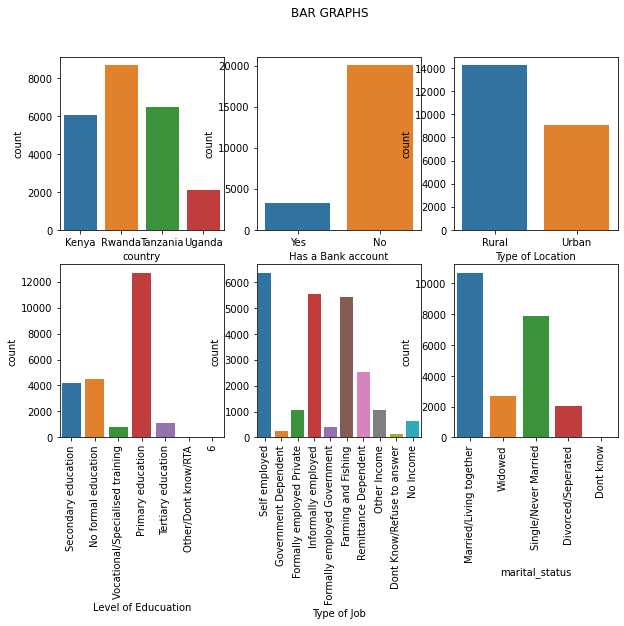

In [37]:
# Data Vizualization
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (10,7))

plt.suptitle('BAR GRAPHS')

plt.xticks(rotation=90)
sns.countplot(df.country, ax=ax1)
sns.countplot(df['Has a Bank account'], ax=ax2)
sns.countplot(df['Type of Location'], ax=ax3)

EDUCUATION = sns.countplot(df['Level of Educuation'], ax=ax4)
EDUCUATION.set_xticklabels(EDUCUATION.get_xticklabels(),rotation = 90)

JOBTYPE=sns.countplot(df['Type of Job'], ax=ax5)
JOBTYPE.set_xticklabels(JOBTYPE.get_xticklabels(),rotation = 90)

STATUS=sns.countplot(df['marital_status'], ax=ax6)

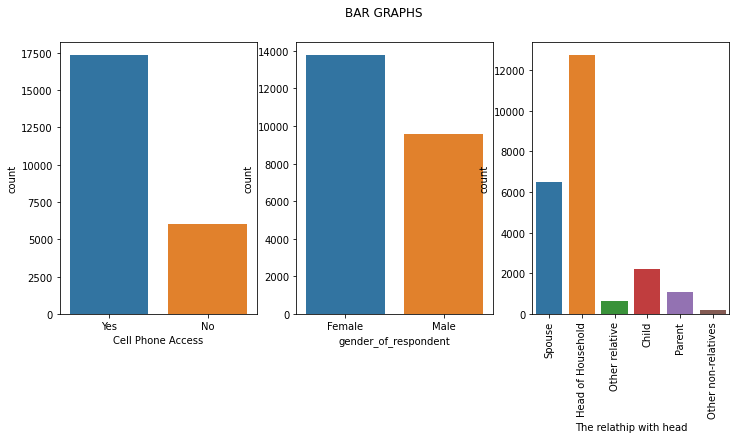

In [38]:
# Visualize demopgraphic data and access to phone

fig, (ax4,ax5,ax6) = plt.subplots(1,3,figsize = (12,5))
plt.suptitle('BAR GRAPHS')
plt.xticks(rotation=90)
sns.countplot(df['Cell Phone Access'], ax=ax4)
sns.countplot(df['gender_of_respondent'], ax=ax5)
sns.countplot(df['The relathip with head'], ax=ax6)

In [40]:
#Skewness
print("HOUSEHOLD SIZE SKEWNWSS = ",df['household_size'].skew())
print("HOUSEHOLD SIZE KURTOSIS = ",df['household_size'].kurt())
print('\n')
print("AGE SKEWNWSS = ",df['Respondent Age'].skew())
print("AGE KURTOSIS = ",df['Respondent Age'].kurt())

HOUSEHOLD SIZE SKEWNWSS =  0.9741827150450616
HOUSEHOLD SIZE KURTOSIS =  1.1538357462528523


AGE SKEWNWSS =  0.8406145812311228
AGE KURTOSIS =  0.09826807013177241


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23340 non-null  object 
 1   year                    23340 non-null  int64  
 2   Has a Bank account      23340 non-null  object 
 3   Type of Location        23340 non-null  object 
 4   Cell Phone Access       23340 non-null  object 
 5   household_size          23340 non-null  float64
 6   Respondent Age          23340 non-null  float64
 7   gender_of_respondent    23340 non-null  object 
 8   The relathip with head  23340 non-null  object 
 9   marital_status          23340 non-null  object 
 10  Level of Educuation     23340 non-null  object 
 11  Type of Job             23340 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.9+ MB


In [42]:
# Frequency tables for categorical variables
print('country')
print(df.country.value_counts())
print("\n")
print('year')
print(df['year'].value_counts())
print("\n")
print('BANK ACCOUNT ACCESS')
print(df['Has a Bank account'].value_counts())
print("\n")
print('RESPONDENTS LOCATION')
print(df['Type of Location'].value_counts())
print("\n")
print('CELLPHONE ACCESS')
print(df['Cell Phone Access'].value_counts())
print("\n")
print('RESPONDENTS GENDER')
print(df['gender_of_respondent'].value_counts())
print("\n")
print('RESPONDENT RELATIONSHIP RELATION WITH HOUSEHEAD')
print(df['The relathip with head'].value_counts())
print("\n")
print('MARITAL STATUS')
print(df['marital_status'].value_counts())
print("\n")
print('EDUCATION LEVEL')
print(df['Level of Educuation'].value_counts())
print("\n")
print('JOBTYPE')
print(df['Type of Job'].value_counts())

country
Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64


year
2016    8683
2018    8157
2017    6500
Name: year, dtype: int64


BANK ACCOUNT ACCESS
No     20044
Yes     3296
Name: Has a Bank account, dtype: int64


RESPONDENTS LOCATION
Rural    14263
Urban     9077
Name: Type of Location, dtype: int64


CELLPHONE ACCESS
Yes    17331
No      6009
Name: Cell Phone Access, dtype: int64


RESPONDENTS GENDER
Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64


RESPONDENT RELATIONSHIP RELATION WITH HOUSEHEAD
Head of Household      12729
Spouse                  6470
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: The relathip with head, dtype: int64


MARITAL STATUS
Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, 

2. Bivariate Analysis

In [44]:
# Analysis of our numeric data

!pip install researchpy
import researchpy as rp

In [46]:
print('AGE ANALYSIS PER COUNRY')
print(round(rp.summary_cont(df.groupby(['country'])['Respondent Age'])))
print('\n')
print('HOUSEHOLDSIZE ANALYSIS PER COUNRY')
print(round(rp.summary_cont(df.groupby(['country'])['household_size'])))

AGE ANALYSIS PER COUNRY


             N  Mean    SD   SE  95% Conf.  Interval
country                                             
Kenya     6062  40.0  17.0  0.0       39.0      40.0
Rwanda    8683  39.0  16.0  0.0       39.0      40.0
Tanzania  6500  38.0  16.0  0.0       38.0      39.0
Uganda    2095  35.0  15.0  0.0       35.0      36.0


HOUSEHOLDSIZE ANALYSIS PER COUNRY


             N  Mean   SD   SE  95% Conf.  Interval
country                                            
Kenya     6062   4.0  2.0  0.0        4.0       4.0
Rwanda    8683   4.0  2.0  0.0        4.0       5.0
Tanzania  6500   2.0  1.0  0.0        2.0       2.0
Uganda    2095   5.0  3.0  0.0        5.0       5.0


In [47]:
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
# VISUALIVING RELATIONSHIP BETWEEN GENDER AND ACCESS TO BANK ACCOUNT   (Rework Analysis)
df.plot(x= 'Respondent Age', y= 'Has a Bank account', kind = "bar")
plt.title("HOUSEHOLD SIZE AND AGE SCATTER PLOT")

Text(0.5, 1.0, 'HOUSEHOLD SIZE AND AGE SCATTER PLOT')

In [0]:
df_country = df[df['Has a Bank account']=='yes']
df_country = df_country.groupby(['country'])['Has a Bank account'].value_counts()
df_country.plot(kind = 'bar',stacked = True)
plt.title('Number of People with Bank Accounts with respect to country')
plt.xlabel('COUNTRY')
plt.ylabel('PEOPLE')



In [0]:
Education = df[df['Has a Bank account']=='yes']
Education = Education.groupby(['Has a Bank account'])['Level of Educuation'].value_counts().plot(kind = "line")
plt.xticks(rotation = 90)
plt.title('NUMBER OF PEOPLE WITH BANK ACCOUNTS PER EDUCATION LEVEL')
plt.xlabel('Level of Educuation')
plt.ylabel('PEOPLE COUNT')
# BANK ACCOUNT OWNERSHIP INCREASES AS LEVEL OF EDUVATION INCREASES
# FEW PEOPLE WITH NO FORMAL EDUCATION  HAVE BANK ACCOUNTS

In [0]:
# cheking trend of bank accounts over time

time = df[df['Has a Bank account']=='yes']
time = time.groupby(['year'])['Has a Bank account'].value_counts().plot(kind = "line")
plt.xticks(rotation = 90)
plt.title('NUMBER OF PEOPLE WITH BANK ACCOUNTS PER YEAR')
plt.xlabel('YEAR')
plt.ylabel('PEOPLE COUNT')
# BANK ACCOUNT OWNERSHIP INCREASES OVER TIME

In [57]:
df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [59]:
#Convert Categorical Data To Numerical
df = df

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

df['Has a Bank account']= Encoder.fit_transform(df['Has a Bank account'])
df['Cell Phone Access']= Encoder.fit_transform(df['Cell Phone Access'])
df['household_size']= Encoder.fit_transform(df['household_size'])
df['Respondent Age']= Encoder.fit_transform(df['Respondent Age'])
df['gender_of_respondent']= Encoder.fit_transform(df['gender_of_respondent'])
df['The relathip with head']= Encoder.fit_transform(df['The relathip with head'])
df['marital_status']= Encoder.fit_transform(df['marital_status'])
df['Level of Educuation']= Encoder.fit_transform(df['Level of Educuation'])
df['Type of Location']= Encoder.fit_transform(df['Type of Location'])
df['Type of Job']= Encoder.fit_transform(df['Type of Job'])

df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,3,8,0,5,2,4,9
1,Kenya,2018,0,0,0,5,54,0,1,4,1,4
2,Kenya,2018,1,1,1,5,10,1,3,3,6,9
3,Kenya,2018,0,0,1,5,18,0,1,2,3,3
4,Kenya,2018,0,1,0,8,10,1,0,3,3,5


In [60]:
df.nunique()

country                    4
year                       3
Has a Bank account         2
Type of Location           2
Cell Phone Access          2
household_size            21
Respondent Age            85
gender_of_respondent       2
The relathip with head     6
marital_status             5
Level of Educuation        7
Type of Job               10
dtype: int64

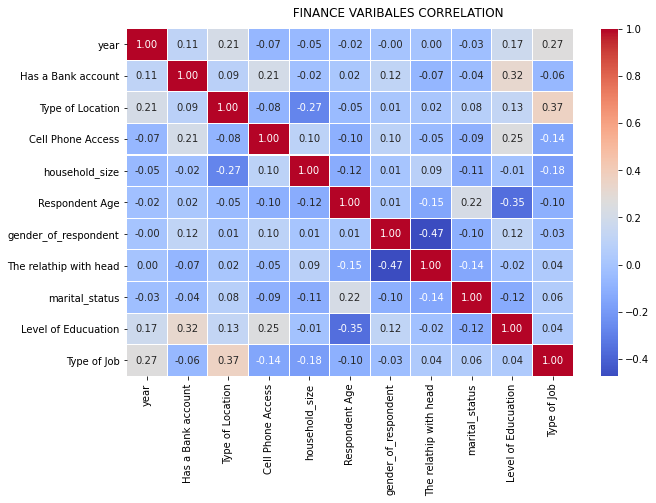

In [61]:
#CORRELATION PLOT BETWEEN FACTORS
f , ax = plt.subplots(figsize = (10,6))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle(' FINANCE VARIBALES CORRELATION')

In [63]:
#Pearsons Coefficient

Relationship = df['Has a Bank account'].corr(df['Cell Phone Access'], method='pearson')
print(Relationship)
# MODERATE POSITIVE CORRELATION
# AS MORE PEOPLE HAVE ACCESS TO PHONES THE BANK ACCOUNTS INCREASE

0.2095118918266013


3. Multivariate Analysis

In [0]:
#DATA REDUCTION USING PRINCIPAL COMPONENT ANALYSIS

x= df.drop('COUNTRY',1)
y = df['COUNTRY']

# SPLITING DATA INTO TRAINING SETS AND TEST SETS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

#Normalizing data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#applying PCA
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#Expalined varience Ratio
explained_variance = pca.explained_variance_ratio_
print('explained_variance =',explained_variance)

#Using principal component
pca = PCA(n_components=1)
Xtrain = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
 Classifier = RandomForestClassifier(max_depth = 2,random_state -0)